In [2]:
import numpy as np  

total_tosses = 30
num_heads = 24
prob_head = 0.5

#0 is tail. 1 is heads. Generate one experiment
experiment = np.random.randint(0,2,total_tosses)
print("Data of the Experiment:", experiment)
#Find the number of heads
print("Heads in the Experiment:", experiment[experiment==1])  #This will give all the heads in the array
head_count = experiment[experiment==1].shape[0] #This will get the count of heads in the array
print("Number of heads in the experiment:", head_count)

Data of the Experiment: [0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1]
Heads in the Experiment: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number of heads in the experiment: 16


In [3]:
#Now, the above experiment needs to be repeated 100 times. Let's write a function and put the above code in a loop

def coin_toss_experiment(times_to_repeat):

    head_count = np.empty([times_to_repeat,1], dtype=int)
    
    for times in np.arange(times_to_repeat):
        experiment = np.random.randint(0,2,total_tosses)
        head_count[times] = experiment[experiment==1].shape[0]
    
    return head_count

In [4]:
head_count = coin_toss_experiment(100)

In [5]:
head_count[:10]

array([[12],
       [12],
       [17],
       [13],
       [21],
       [13],
       [15],
       [17],
       [12],
       [18]])

In [7]:
print("Dimensions:", head_count.shape, "\n","Type of object:", type(head_count))

Dimensions: (100, 1) 
 Type of object: <class 'numpy.ndarray'>


In [8]:
#Let's plot the above distribution
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

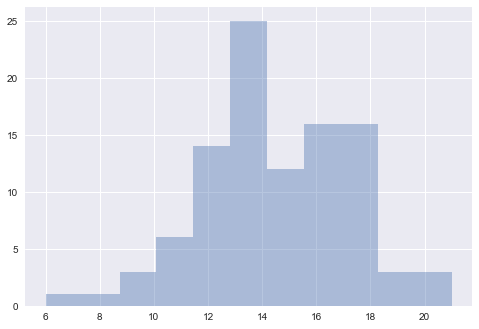

In [9]:
sns.distplot(head_count, kde=False)

In [10]:
#Number of times the experiment returned 24 heads.
head_count[head_count>=24]

array([], dtype=int64)

In [11]:
print("No of times experiment returned 24 heads or more:", head_count[head_count>=24].shape[0])
print("% of times with 24 or more heads: ", head_count[head_count>=24].shape[0]/float(head_count.shape[0])*100)

No of times experiment returned 24 heads or more: 0
% of times with 24 or more heads:  0.0


In [14]:
#Now, the above experiment needs to be repeated 100 times. Let's write a function and put the above code in a loop

def coin_toss_experiment1(times_to_repeat):

    head_count1 = np.empty([times_to_repeat,1], dtype=int)
    
    for times in np.arange(times_to_repeat):
        experiment1 = np.random.randint(0,2,total_tosses)
        head_count1[times] = experiment1[experiment1==1].shape[0]
    
    return head_count1

In [15]:
head_count1 = coin_toss_experiment1(100000)

In [16]:
print("No of times experiment returned 24 heads or more:", head_count1[head_count1>=24].shape[0])
print("% of times with 24 or more heads: ", head_count1[head_count1>=24].shape[0]/float(head_count1.shape[0])*100)

No of times experiment returned 24 heads or more: 56
% of times with 24 or more heads:  0.055999999999999994


In [17]:
def coin_toss_experiment_2(times_to_repeat):

    head_count = np.empty([times_to_repeat,1], dtype=int)
    experiment = np.random.randint(0,2,[times_to_repeat,total_tosses])
    return experiment.sum(axis=1)

In [18]:
head_count = coin_toss_experiment_2(100000)

In [19]:
print("No of times experiment returned 24 heads or more:", head_count[head_count>=24].shape[0])
print("% of times with 24 or more heads: ", head_count[head_count>=24].shape[0]/float(head_count.shape[0])*100)

No of times experiment returned 24 heads or more: 66
% of times with 24 or more heads:  0.066


In [20]:
import time
start_time = time.time()
head_count = coin_toss_experiment_2(100000)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.03548789024353027 seconds ---


In [21]:
import time
start_time = time.time()
head_count = coin_toss_experiment(100000)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.6095170974731445 seconds ---


Note from class.
http://machinelearningmastery.com/start-here/
http://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [22]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [23]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [24]:
# shape
print(dataset.shape)

(150, 5)


In [25]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

TypeError: 'Index' object is not callable